# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [1]:
!pip install seaborn

In [2]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [3]:
#Load given dataset
data = p.read_csv('spam.csv', encoding='latin-1')
del data["Unnamed: 2"]
del data["Unnamed: 3"]
del data["Unnamed: 4"]

In [4]:
data = data.rename(columns={"v1":"label", "v2":"text"})
df=data.dropna()

Spliting Train/Test:

In [5]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='label', axis=1)
#Response variable
y = df.loc[:,'label']  

In [6]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  3900
Number of test dataset:  1672
Total number of dataset:  5572


In [7]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Distribution of Spam and Ham')

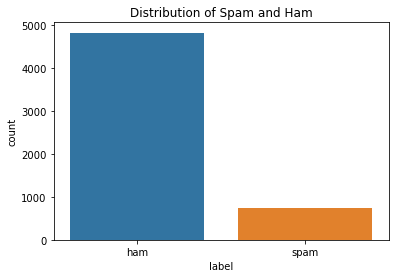

In [8]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "label", data = df)
df.loc[:, 'label'].value_counts()
plt.title('Distribution of Spam and Ham')

C:\Users\nagab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


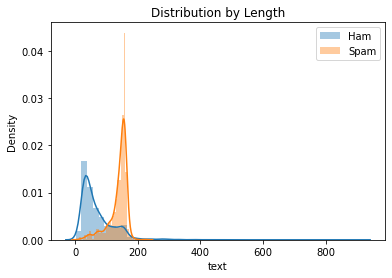

In [9]:
# plotting graph by length.
ham =df[df['label'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = df[df['label'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

<ipython-input-10-0b8056763726>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ham1 = df[df['label'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
C:\Users\nagab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-10-0b8056763726>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  spam1 = df[df['label'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
C:\Users\nagab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

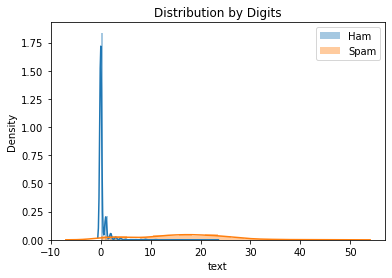

In [10]:
#plotting graph by digits.
ham1 = df[df['label'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = df[df['label'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()

<ipython-input-11-288d0f6b1eab>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ham2 = df[df['label'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
C:\Users\nagab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-11-288d0f6b1eab>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  spam2 = df[df['label'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
C:\Users\nagab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

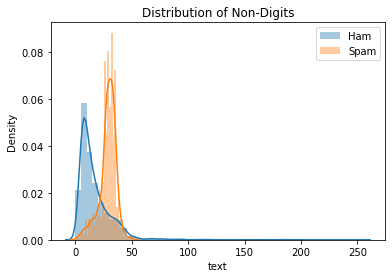

In [11]:
#plotting graph for non-digits.
ham2 = df[df['label'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = df[df['label'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()

In [12]:
#for counting frequently occurence of spam and ham.
from collections import Counter
count1 = Counter(" ".join(df[df['label']=='ham']["text"]).split()).most_common(30)
data1 = p.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='spam']["text"]).split()).most_common(30)
data2 = p.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

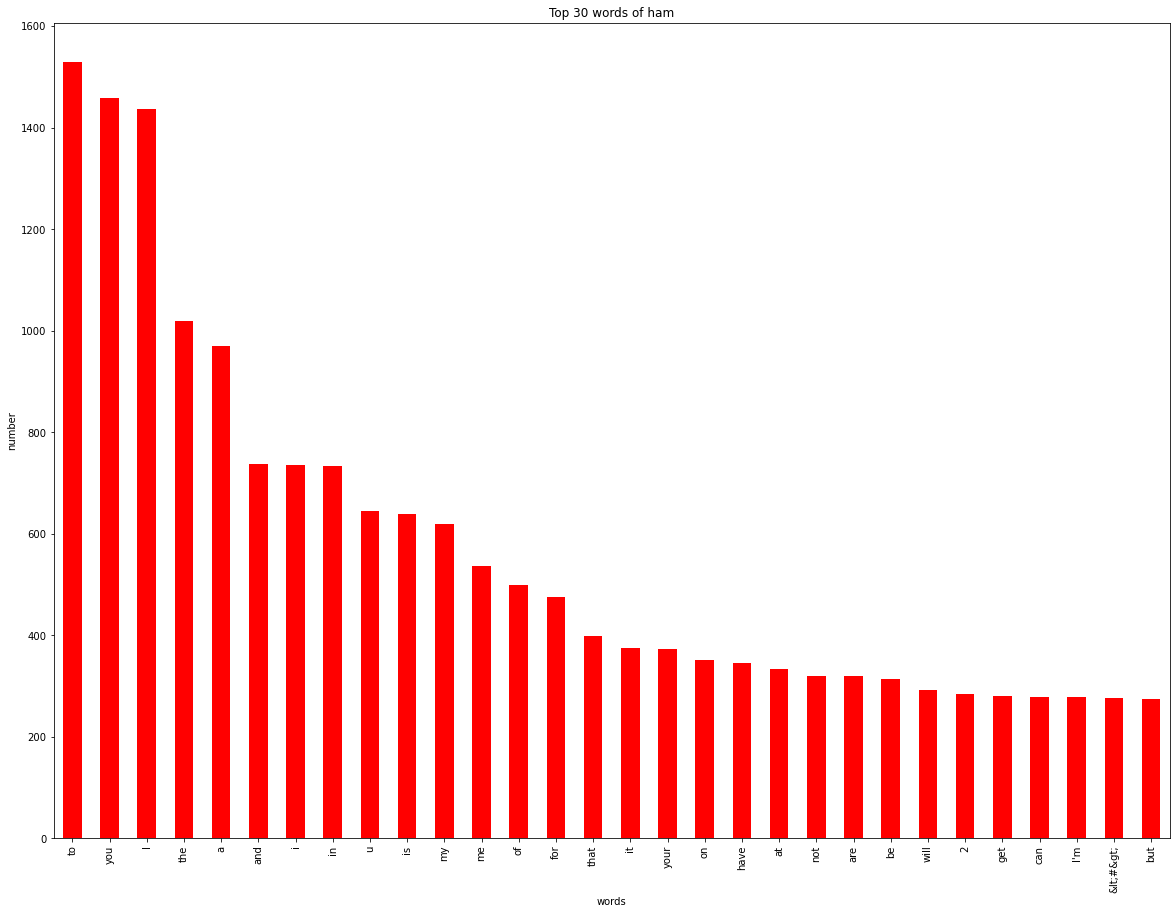

In [13]:
#Graph for top 30 words of ham
data1.plot.bar(legend = False, color = 'red',figsize = (20,15))
y_pos = n.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

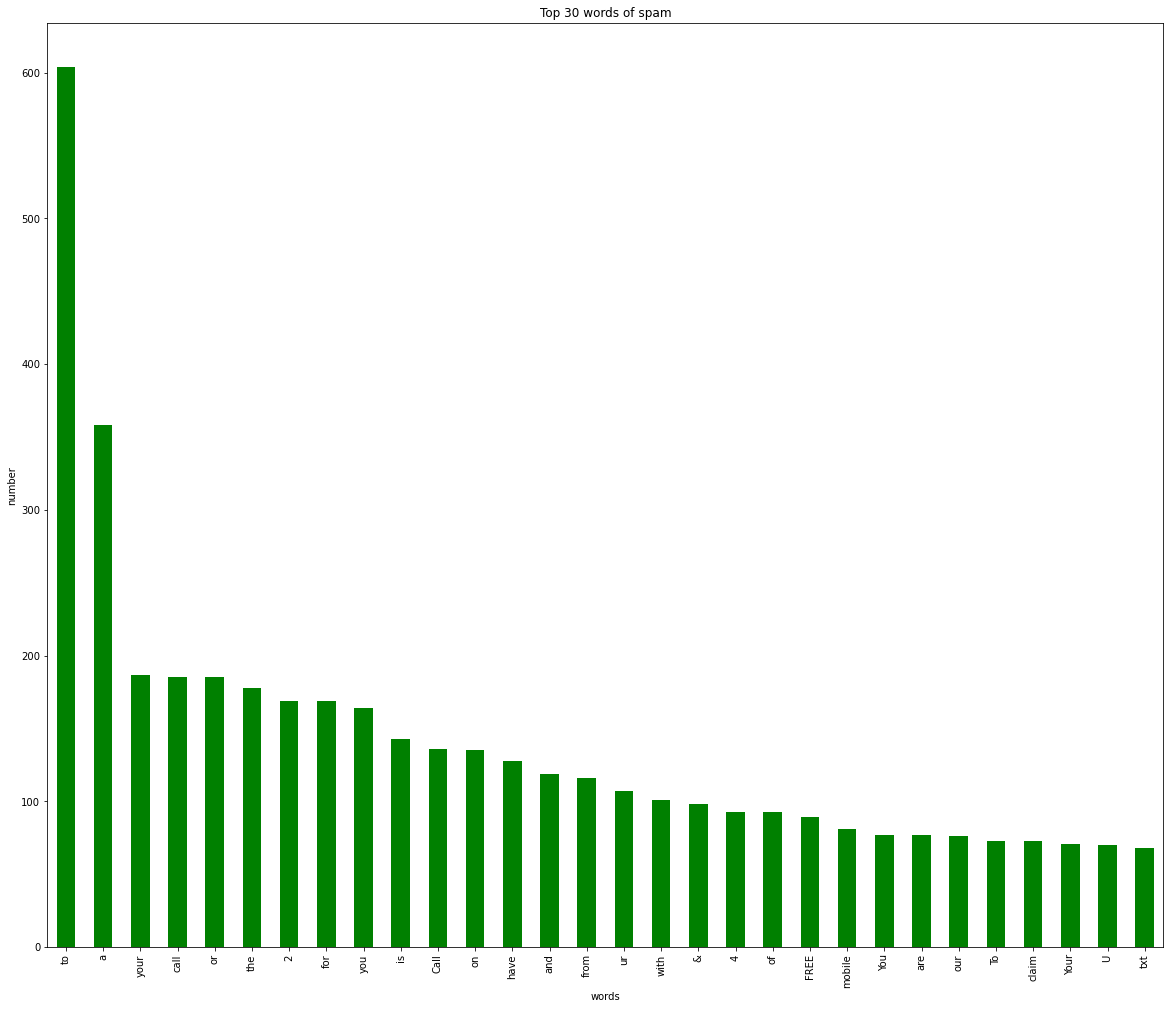

In [14]:
#Graph for top 30 words of spam
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = n.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Training model:

In [15]:
!pip install nltk

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['text']=df['text'].str.strip()
# lowercase the text
df['text'] = df['text'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['text']=df['text'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['text'].split(' '),axis=1)
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [18]:
# label encoding ham=0 and spam=1
df.loc[df['label']=='ham','label']=0
df.loc[df['label']=='spam','label']=1

In [19]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'text':],df['label'],test_size=0.2)

In [20]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in X['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1

In [21]:
!pip install wordcloud

Text(0.5, 1.0, 'HAM')

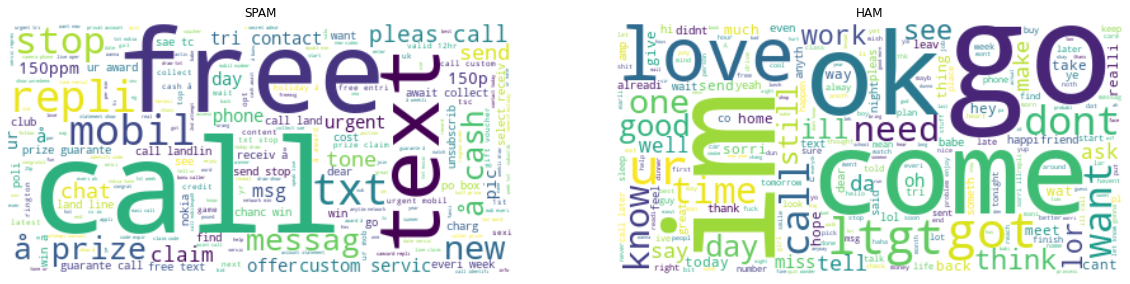

In [22]:
from wordcloud import WordCloud
# Now we look at the types of words in ham and spam. We plot wordclouds for both
ham_text=' '.join(X.loc[y==0,'final_text'].values)
ham_wordcloud = WordCloud(background_color='white',max_words=2000).generate(ham_text)
spam_text=' '.join(X.loc[y==1,'final_text'].values)
spam_wordcloud = WordCloud(background_color='white',max_words=2000).generate(spam_text)
plt.figure(figsize=[20,30])
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud,interpolation='bilinear')
plt.title('SPAM')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HAM')